<a href="https://colab.research.google.com/github/Gauravmehra1/play-store-app-analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

**Import Libraries**

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Importing data from google colab** 

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
File ='/content/drive/MyDrive/EDA/PlayStore.csv'
df=pd.read_csv(File)

**Checking columns , shape and first 5 element** 

In [34]:
df.columns


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
df.shape

In [82]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**Play store data frame has 13 rows and 10841 columns**

**App**- It will tell about the name of apps in data frame 

**category** -It tells the app catagory 

**Rating** - In this we will know about the rating of app 

**Reviews** - It tell us the reviews give by the users 

**Size** - It tells us about the size of application in our moblie phone 

**Installs** - It will lets us know about the downloads

**Type**- Tell us the app is free or paid 

**Price**- It will  give us the app price and for free app it will give Zero

**content rating** - It will tell us the app can be used by everyone or by teen 

**Genres**-it tells us about the various other categories to which an application can belong.

**Last updated**- It tells us when app updated 

**Current ver**- It tells us the updated version of the app 

**Android ver**- It tell us which android version is used by the app












In [ ]:
#taking info of our data frame 
df.info()

In [ ]:
# printing duplicate rows and coloumn 
df[df.duplicated()]

**we will take data of all Duplicate app and will drop them**

In [ ]:
df.drop_duplicates()

In [ ]:
df.drop_duplicates(subset=['App'])


**Asalysis on APP**

In [ ]:
#takinf first 5 app 
df['App'].head()

In [ ]:
#counting the number of time each App appers 
pd.value_counts(df['App'].values)

In [ ]:
#taking out the uniique App
df['App'].unique()

In [ ]:
#droping down the Duplicat App
df.drop_duplicates(['App'],inplace=True)
df

In [ ]:
#checking if our duplicate values has been droped 
pd.value_counts(df['App'].values)

In [ ]:
df[df['App']=='ROBLOX']

**Asalysis Category**

In [ ]:
df['Category'].head(5)

In [12]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [ ]:
pd.value_counts(df['Category'].values)

**Last value is 1.9 which in not a correct category We will replace this with NAN**

In [68]:
df[df['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
#replacing 1.9 with NAN using swip method 
df.loc[10472,'App']=df.loc[10472,'Category']
df.loc[10472,'Category']=np.nan
df.loc[10472]

In [ ]:
#Ploting in terms of app category 

plt.rcParams['figure.figsize'] = (20, 10)
df['Category'].value_counts().plot(kind='bar')
plt.title('Counts of app Category')
plt.ylabel('numbers of app users')
plt.xlabel('app categories')

**Rating**

In [ ]:
#we are taking the top 10 values of Rating
df['Rating'].head(10)

In [48]:
#finding out the NaN rating
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [ ]:
#Replacing nan rating with 0 
df.fillna({'Rating':0},inplace=True)


In [55]:
#checking the values are replace with 0 
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 0. , 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [ ]:
#checking the numbers of apps as per there reating 
pd.value_counts(df['Rating'].values)

In [ ]:
#checking the number of App greater the 5
df[df.Rating>5]

In [44]:
#removing the App whose reatingis greater than 5
df.drop([10472],inplace=True)

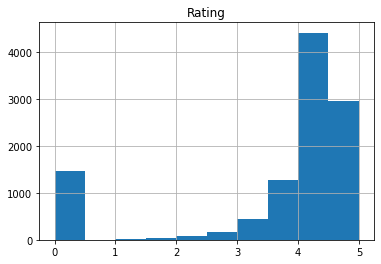

In [56]:
#Taking out the histogram as per the rating 
df.hist();


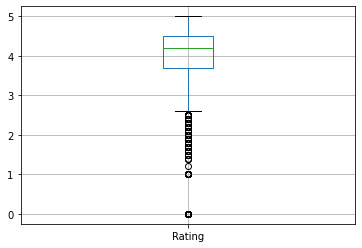

In [57]:
#checking the reating with box plot
df.boxplot()

#**Reviews**